#### ERA Interim precipitation anomaly maps for each WT using 12Z initial 24 hr forecast 
 - 1) calculate precipitation climatology
 - 2) precipitation anomalies of WTs
 - 3) precipitation anomaly maps for each WT

In [1]:
import datetime 
import calendar
import numpy as np
import pandas as pd
import xarray as xr
import cfgrib
import matplotlib.pyplot as plt
import glob 
import os.path
import cartopy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# inorder to import my pathon module, add
# $PYTHONPATH for jupyter for module
sys.path.append("/glade/u/home/mingge/PYTHON")

import coexist_func
from importlib import reload
reload(coexist_func)
from coexist_func import plot_prec_12_erai
from coexist_func import cal_prec_cli_erai
from coexist_func import cal_prec_ano_erai

daily precipitation data is from previous ncl code which converts 12Z initila 24-fcst daily data to NetCDF dataset:
get_prec_daily.ncl   <br>

#### 0 setups

In [2]:
dir_erai_grib = '/gpfs/fs1/collections/rda/data/ds627.0/ei.oper.fc.sfc/'
# preprocessed with NCL code (from 12Z init and 24 hour fcst)
# so it shift one day for real time
dir_erai = '/glade/campaign/mmm/c3we/mingge/COEXIST/ERAI/prec/'
dir_wt = '/glade/campaign/mmm/c3we/mingge/COEXIST/ERAI/WT/'
 
year_s = 1979
year_e = 2014

#### 1) calculate precipitation climatology

In [6]:
flnm_o = dir_erai + 'prec_clim_' + str(year_s) + '-' + str(year_e) + '.nc'
prec_cli = cal_prec_cli_erai(dir_erai, year_s, year_e, flnm_o)

/glade/campaign/mmm/c3we/mingge/COEXIST/ERAI/prec/prec_clim_1979-2014.nc exist


#### 2) precipitation anomalies of WTs

In [4]:
flnm_o = dir_erai + 'prec_ano.nc'
prec_xr = cal_prec_ano_erai(dir_erai, dir_wt,  year_s, year_e, prec_cli, flnm_o)

/glade/campaign/mmm/c3we/mingge/COEXIST/ERAI/prec/prec_ano.nc exist


#### 3) ensemble average precipitation anomaly maps for each WT

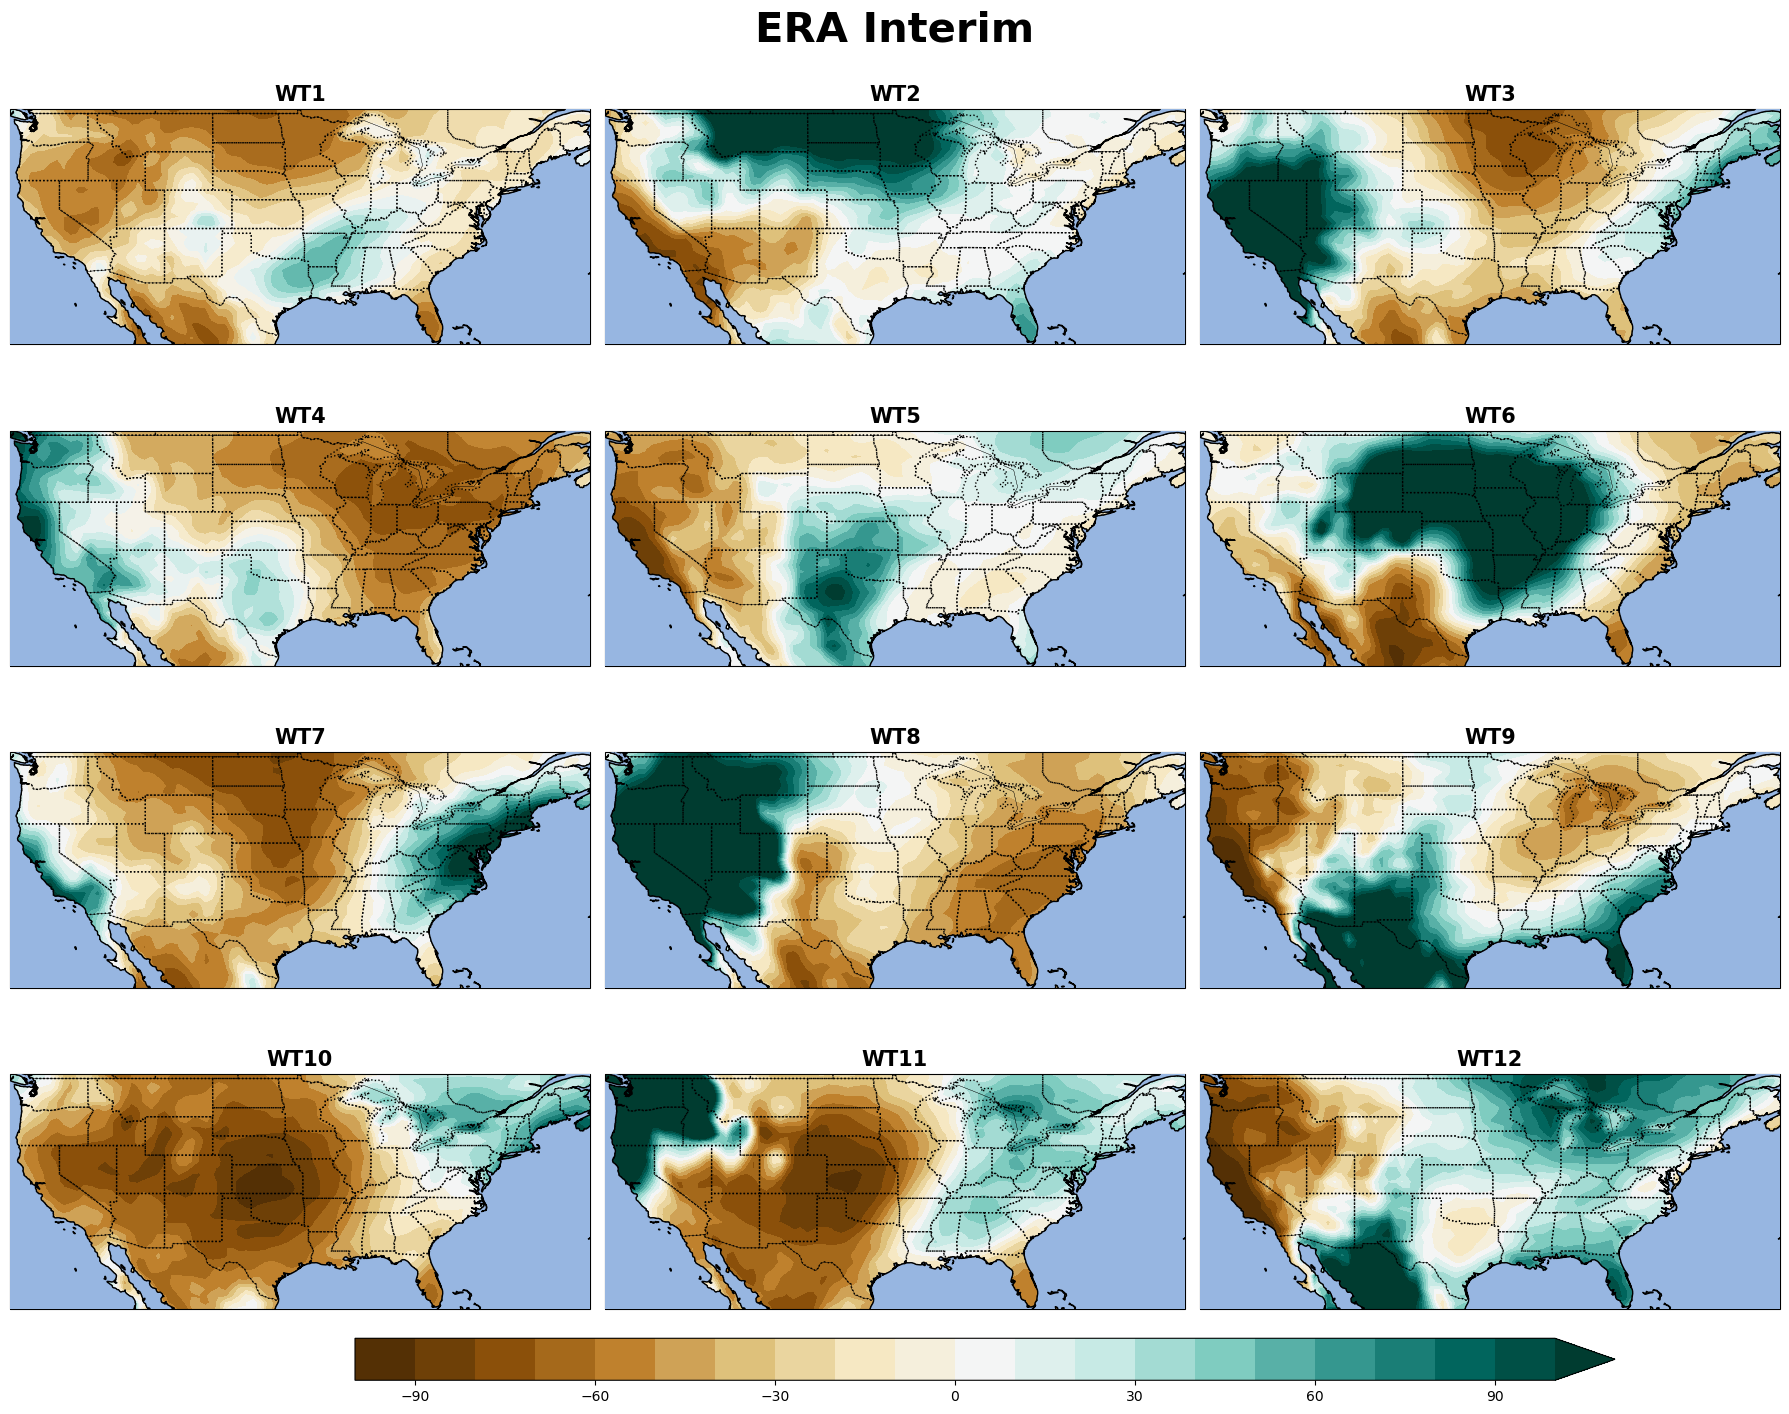

In [5]:
plot_prec_12_erai(prec_xr, -100, 100, 21, 'BrBG', 'horizontal', 'ERA Interim') 